# Assignment X: Topic Modeling Jay

## Import necessary dependencies and settings

In [1]:
import warnings
warnings.filterwarnings("ignore")#, category=DeprecationWarning)

In [2]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import nltk, random
from nltk.corpus import movie_reviews
from nltk.stem import PorterStemmer

pd.options.display.max_colwidth = 200
%matplotlib inline

## Sample corpus of text documents

### Jay Songs

In [3]:
import pickle
with open('jay_seg.pickle', 'rb') as f:
    jay_seg = pickle.load(f)

In [4]:
corpus_df =pd.read_csv('../../../RepositoryData/data/data-chinese-songs-jaychou.csv')

In [5]:
corpus_df.head()

,title,lyric
0,我是如此相信,鳥群離開了森林 整座天空很灰心\n蝴蝶不再被吸引 玫瑰盛開的很安靜\n遠方的風雨不停 城市蒼白而孤寂\n徘徊無助的人群 焦慮著何時放晴\n故事裡能毀壞的只有風景\n誰也摧毀不了我們的夢境\n弦月旁的流星劃過了天際\n我許下的願望該向誰去說明\n隕石在浩瀚的宇宙間旅行\n璀璨的夜空裡漫天的水晶\n我的禱告終於有了回音\n我是如此相信 在背後支撐的是你\n一直與我並肩而行 仰望等太陽升起\n聽...
1,英雄,人生不是ㄧ個人的遊戲\nㄧ起奮鬥ㄧ起超越ㄧ起殺吧sup兄弟\n好戰好勝戰勝逆命\n管他天賦夠不夠我們都還需要再努力\n你的劍就是我的劍\n艾希的箭可不可以準ㄧ點 嘿\n你打野我來控兵線\n不要隨便慌張就交閃現\n旋轉跳躍你閉著眼\n卡特轉完會讓你閉上眼\n悟空蓋倫也轉圈圈\n盲僧李先生ㄧ腳把你 踢回老家\n擊殺 雙殺 三殺 Penta kill\n扛塔 偷拆 插眼讓我傳送\n...
2,雙截棍,岩燒店的煙味瀰漫 隔壁是國術館\n店裡面的媽媽桑 茶道 有三段\n教拳腳武術的老板 練鐵沙掌 耍楊家槍\n硬底子功夫最擅長 還會金鐘罩鐵布衫\n他們兒子我習慣 從小就耳濡目染\n什麼刀槍跟棍棒 我都耍的有模有樣\n什麼兵器最喜歡 雙截棍柔中帶剛\n想要去河南嵩山 學少林跟武當\n幹什麼(客) 幹什麼(客) 呼吸吐納心自在\n幹什麼(客) 幹什麼(客) 氣沉丹田手...
3,開不了口,才離開沒多久就開始 擔心今天的妳過得好不好\n整個畫面是妳 想妳想的睡不著\n嘴嘟嘟那可愛的模樣 還有在妳身上香香的味道\n我的快樂是妳 想妳想的都會笑\n沒有妳在我有多難熬(沒有妳在我有多難熬多煩惱)\n沒有妳煩我有多煩惱(沒有妳煩我有多煩惱多難熬)\n穿過雲層 我試著努力向妳奔跑\n愛才送到 妳卻已在別人懷抱\n就是開不了口 讓她知道\n我一定會呵護著妳 也逗妳笑\n妳...
4,床邊故事,從前從前有隻貓頭鷹 牠站在屋頂\n屋頂後面一遍森林 森林很安靜\n安靜的鋼琴在大廳 閣樓裡 仔細聽\n仔細聽 叮叮叮 什麼聲音\n乖乖睡 不要怕 聽我說\n乖乖睡 醒來就 吃蘋果\n不睡覺 的時候 有傳說\n會有人 咬你的 小指頭\n這故事 繼續翻頁 再翻頁\n你繼續 不想睡 我卻想睡\n然後我準備 去打開衣櫃\n去看看 躲著誰 去看看 躲著誰\...


In [6]:
norm_corpus = [' '.join([w for w,p in d if p in ['Na','VC']]) for d in jay_seg]

In [7]:
norm_corpus[0]

'鳥群 離開 森林 灰心 蝴蝶 玫瑰 風雨 人群 故事 毀壞 風景 摧毀不了 夢境 弦月 流星 劃過 許下 願望 隕石 宇宙 水晶 回音 支撐 仰望 太陽 鳥群 聲音 守候 人 信心 雙手 彈奏 出 鳥群 離開 森林 蝴蝶 玫瑰 風雨 人群 故事 毀壞 風景 摧毀不了 夢境 弦月 流星 許下 願望 隕石 宇宙 水晶 回音 支撐 仰望 等 太陽 鳥群 聲音 守候 人 信心 雙手 彈奏 出 支撐 仰望 等 太陽 鳥群 聲音 守候 人 信心 雙手 彈奏出'

## Bag of Words Model

- Bag-of-words model is the simplest way to vectorize texts into numeric representations.
- In short, it is a method to represent a text using its word frequency list.
- The sequential order of words in the text is therefore naively ignored.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
# get bag of words features in sparse format
cv = CountVectorizer(min_df=2, max_df=1.0,token_pattern=r'[^\s0-9]+')
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix

<212x1353 sparse matrix of type '<class 'numpy.int64'>'
	with 6039 stored elements in Compressed Sparse Row format>

In [9]:
# view dense representation 
# warning might give a memory error if data is too big
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
# get all unique words in the corpus
vocab = np.array(cv.get_feature_names())
# show document feature vectors
pd.DataFrame(cv_matrix, columns=vocab)

,..,...,一,一生,一統,上,上帝,下,世事,世人,...,默,默劇,默契,默片,點,點亮,點心,鼻子,龍,龍捲風
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
208,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
210,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Latent Dirichlet Allocation

- Find optimal topic number

In [11]:
%%time
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

# Options to try with our LDA
# Beware it will try *all* of the combinations, so it'll take ages
search_params = {
  'n_components': [4,5,6,7,8],
  'learning_decay': [.5, .7]
}

# Set up LDA with the options we'll keep static
model = LatentDirichletAllocation(learning_method='batch', max_iter = 10000, random_state=0)

# Try all of the options
gridsearch = GridSearchCV(model, param_grid=search_params, n_jobs=-1, verbose=1)
gridsearch.fit(cv_matrix)

## Save the best model
best_lda = gridsearch.best_estimator_

## took 2h 42min 28s

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 126.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 149.6min finished


CPU times: user 11min 43s, sys: 4.01 s, total: 11min 47s
Wall time: 2h 42min 28s


In [12]:
cv_results_df = pd.DataFrame(gridsearch.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_decay,param_n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,713.381181,18.402268,0.025866,0.003338,0.5,4,"{'learning_decay': 0.5, 'n_components': 4}",-18753.338413,-18605.844619,-18747.728093,-19624.055808,-19895.424750,-19125.278337,527.749817,1
1,680.229616,14.324856,0.030696,0.003006,0.5,5,"{'learning_decay': 0.5, 'n_components': 5}",-19425.584131,-19268.965549,-19345.123411,-20410.443174,-20591.719535,-19808.367160,570.650188,3
2,645.259369,19.034365,0.034191,0.005401,0.5,6,"{'learning_decay': 0.5, 'n_components': 6}",-20099.794346,-19925.540086,-20005.228409,-21066.560406,-21177.728864,-20454.970422,548.659544,5
3,633.004029,11.746051,0.029470,0.002411,0.5,7,"{'learning_decay': 0.5, 'n_components': 7}",-20633.710792,-20421.088056,-20546.818837,-21695.850067,-21796.748967,-21018.843344,598.651963,7
4,609.596647,23.534896,0.028508,0.003966,0.5,8,"{'learning_decay': 0.5, 'n_components': 8}",-21080.415836,-21030.644479,-21083.634725,-22302.460638,-22311.274387,-21561.686013,608.734573,9
5,701.364410,13.725163,0.029705,0.002210,0.7,4,"{'learning_decay': 0.7, 'n_components': 4}",-18753.338413,-18605.844619,-18747.728093,-19624.055808,-19895.424750,-19125.278337,527.749817,1
6,711.663058,50.873928,0.028580,0.002723,0.7,5,"{'learning_decay': 0.7, 'n_components': 5}",-19425.584131,-19268.965549,-19345.123411,-20410.443174,-20591.719535,-19808.367160,570.650188,3
7,758.373666,28.301840,0.030743,0.006270,0.7,6,"{'learning_decay': 0.7, 'n_components': 6}",-20099.794346,-19925.540086,-20005.228409,-21066.560406,-21177.728864,-20454.970422,548.659544,5
8,777.899082,17.296313,0.023996,0.002684,0.7,7,"{'learning_decay': 0.7, 'n_components': 7}",-20633.710792,-20421.088056,-20546.818837,-21695.850067,-21796.748967,-21018.843344,598.651963,7
9,737.206787,88.862735,0.033960,0.011844,0.7,8,"{'learning_decay': 0.7, 'n_components': 8}",-21080.415836,-21030.644479,-21083.634725,-22302.460638,-22311.274387,-21561.686013,608.734573,9


<AxesSubplot:xlabel='param_n_components', ylabel='mean_test_score'>

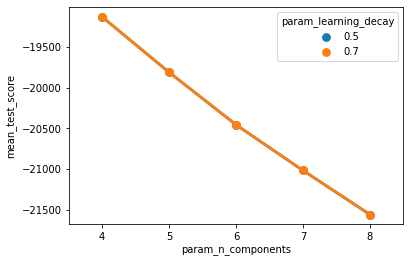

In [13]:
import seaborn as sns
sns.pointplot(x="param_n_components", y="mean_test_score", hue="param_learning_decay", data=cv_results_df)

In [22]:
## Permanent Setting Version
plt.rcParams['font.sans-serif']=["PingFang HK"]
def plot_top_words(model, feature_names, n_top_words, title, fig_grid=[2,2]):
    fig, axes = plt.subplots(fig_grid[0], fig_grid[1], figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

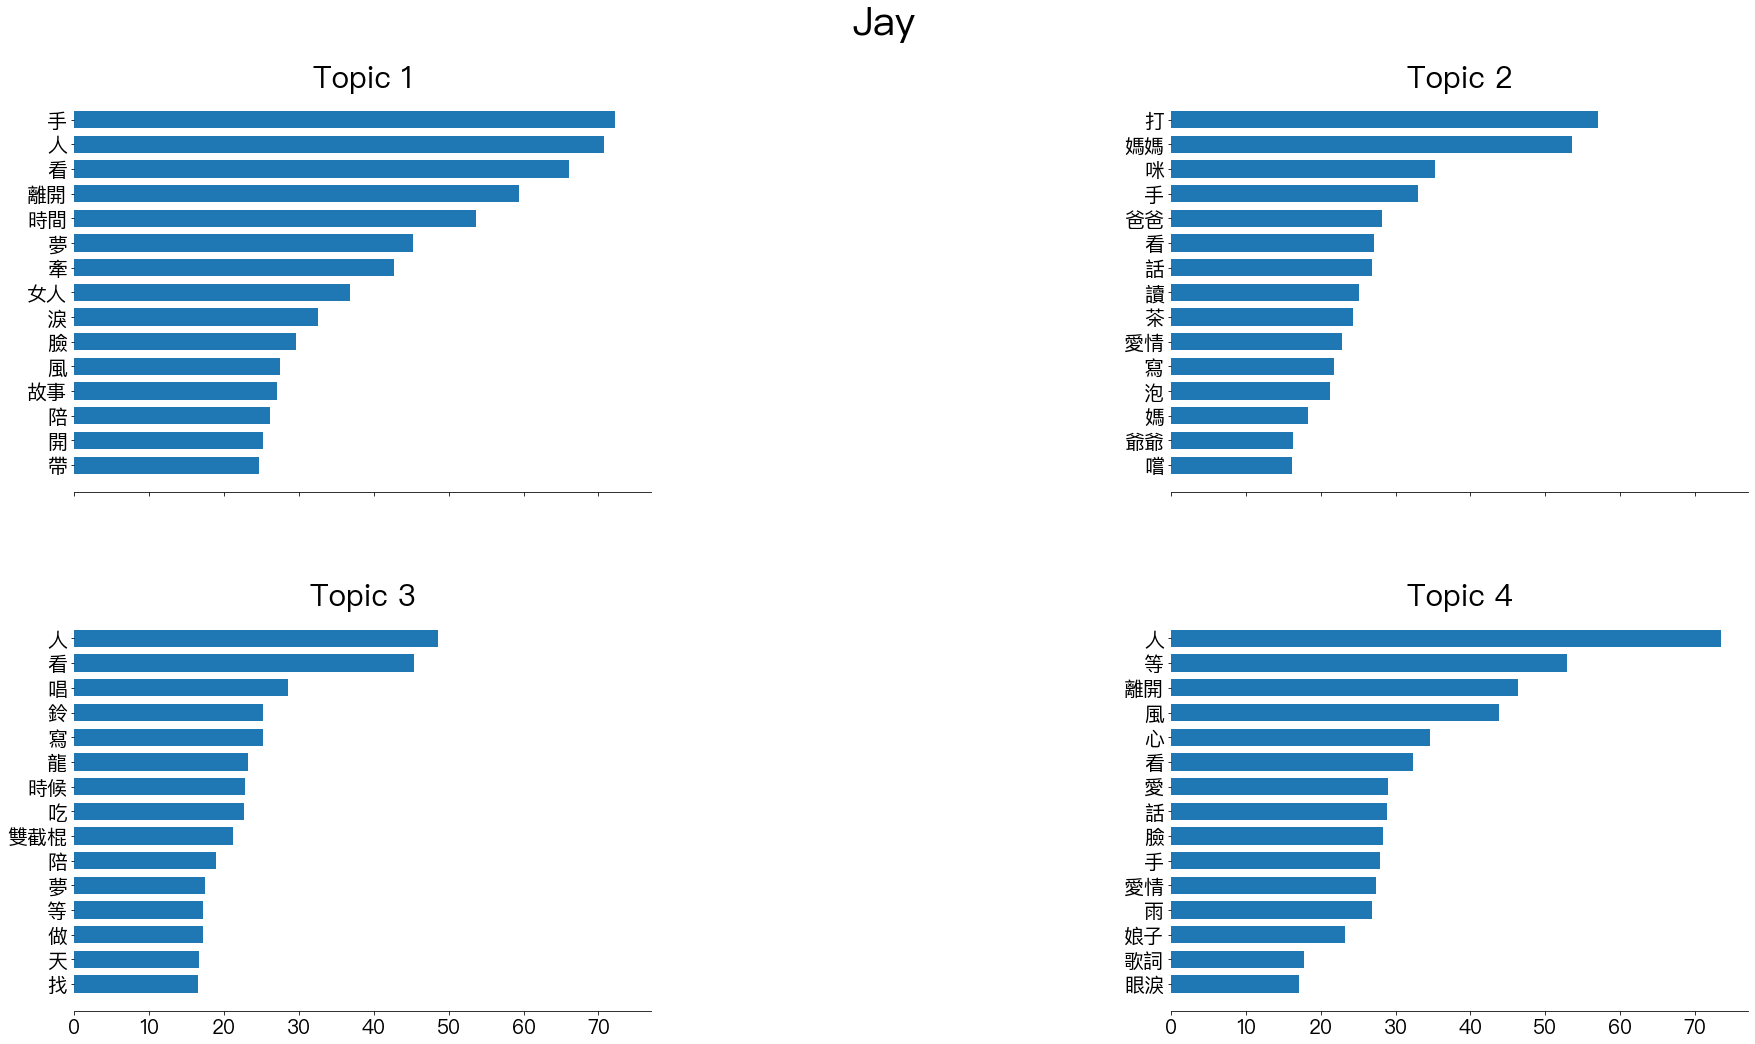

In [24]:
plot_top_words(best_lda, cv.get_feature_names(), n_top_words=15, title="Jay")

In [25]:
doc_topic_matrix = best_lda.transform(cv_matrix)

In [28]:
 num_of_topic = 4

In [ ]:
# %%time
# from sklearn.decomposition import LatentDirichletAllocation


# lda = LatentDirichletAllocation(n_components=num_of_topic, max_iter=10000, random_state=0,
#                                max_doc_update_iter=50, learning_method='online',
#                                batch_size=50, learning_offset = 50, n_jobs = -1)
# dt_matrix = lda.fit_transform(cv_matrix) # document matrix

In [ ]:
# features = pd.DataFrame(dt_matrix, columns = ["T"+str(n) for n in range(1,num_of_topic+1)])
# features

## Show topics and their weights

In [ ]:
# tt_matrix = lda.components_ # topic matrix
# for topic_weights in tt_matrix:
#     topic = [(token, weight) for token, weight in zip(vocab, topic_weights)]
#     topic = sorted(topic, key=lambda x: -x[1])
#     topic = [item for item in topic if item[1] > 0.6]
#     print(topic)
#     print()


In [29]:
topic_terms = best_lda.components_
top_terms = 20
topic_keywords_idxs = np.argsort(-np.absolute(topic_terms), axis=1)[:,:top_terms]
topic_keywords = vocab[topic_keywords_idxs]
topics = [', '.join(w) for w in topic_keywords]
pd.set_option('display.max_colwidth', None)
topics_df = pd.DataFrame(topics,
                        columns = ['Keywords per Topic'],
                        index = ["Topic"+str(n) for n in range(1,num_of_topic+1)])

In [30]:
topics_df

,Keywords per Topic
Topic1,"手, 人, 看, 離開, 時間, 夢, 牽, 女人, 淚, 臉, 風, 故事, 陪, 開, 帶, 眼淚, 望, 放, 功夫, 雨"
Topic2,"打, 媽媽, 咪, 手, 爸爸, 看, 話, 讀, 茶, 愛情, 寫, 泡, 媽, 爺爺, 嚐, 冰淇淋, 味道, 心, 牽, 事"
Topic3,"人, 看, 唱, 鈴, 寫, 龍, 時候, 吃, 雙截棍, 陪, 夢, 等, 做, 天, 找, 拿, 愛情, 錢, 手, 使用"
Topic4,"人, 等, 離開, 風, 心, 看, 愛, 話, 臉, 手, 愛情, 雨, 娘子, 歌詞, 眼淚, 陽光, 光, 感覺, 靈魂, 耍"


In [31]:
pd.options.display.float_format = '{:,.5f}'.format
pd.set_option('display.max_colwidth', 200)


dt_df = pd.DataFrame(doc_topic_matrix,
                    columns=["Topic"+str(n) for n in range(1,num_of_topic+1)])

max_contrib_topics = dt_df.max(axis=0)
dominant_topics = max_contrib_topics.index
contrib_perc = max_contrib_topics.values
document_numbers = [dt_df[dt_df[t]==max_contrib_topics.loc[t]].index[0]
                    for t in dominant_topics]
documents = [norm_corpus[i] for i in document_numbers]

documents_df = pd.DataFrame({'Dominant Topic': dominant_topics,
                            'Contribution%': contrib_perc,
                            'DOCID': document_numbers,
                            'Topic': topics_df['Keywords per Topic'],
                            'Text': documents})

In [32]:
documents_df

,Dominant Topic,Contribution%,DOCID,Topic,Text
Topic1,Topic1,0.99505,111,"手, 人, 看, 離開, 時間, 夢, 牽, 女人, 淚, 臉, 風, 故事, 陪, 開, 帶, 眼淚, 望, 放, 功夫, 雨",望 星星 望 星星 望 星星 望 星 乘 風 雲 形狀 風 吃掉 載 載 陽光 蝴蝶 花 佈滿 夕陽 你我 迎 風 手 牽 手 望 天 看 星星 線 背對背 許下 心願 看 星 手 牽 手 望 天 看 星星 連成 線 背對背 許下 心願 看 星 實現 朋友 歌聲 手 手 歌曲 燈 時間 分寸 輕重 分 支撐 看 身影 黑暗 夢 空間 抱 臉 看 看 夢 畫面 故事 離 時間 抱 挽留 燈...
Topic2,Topic2,0.99294,120,"打, 媽媽, 咪, 手, 爸爸, 看, 話, 讀, 茶, 愛情, 寫, 泡, 媽, 爺爺, 嚐, 冰淇淋, 味道, 心, 牽, 事",爺爺 泡 茶 味道 泡 茶 名 利 拿 爺爺 泡 茶 味道 爺爺 泡 茶 口感 味覺 陸羽 泡 茶 山水畫 山泉 地表 臉 泉水 礦層巖 爺爺 栽種 樟木 樹苗 躲 屋簷 爺爺 抽 煙 陸羽 寫 茶經 翻閱 字典 字眼 事 海角 時間 茶桌 樟木 年輪 鏡頭 臉 年 爺爺 手繭 泡 水 茶色 爺爺 泡 茶 味道 家 挑剔 口感 味覺 陸羽 泡 茶 名 利 拿 牽 馬 爺爺 泡 茶 味...
Topic3,Topic3,0.99478,194,"人, 看, 唱, 鈴, 寫, 龍, 時候, 吃, 雙截棍, 陪, 夢, 等, 做, 天, 找, 拿, 愛情, 錢, 手, 使用",等 寫完 詞 出 專輯 歌 時期 梯田 看過 綠地 攝影 畫面 寫 詞 詩人 公車 看 窗 牛 啃 草 自由自在 那魯灣 牛兒 水溝 流 夢 收割期 人們 汗水 畫面 作品 油畫 拿到 獎狀 用 哼 撕掉 換回 自然 梯田 看 西洋片 水牛 畫 掛 牆壁 人們 蒸蒸日上 遊客 看看 窗 景點 牛兒 那魯灣 利用 利用 人類 破壞 自然 生態 藝術 砍下 樹 醬 裝飾 事 相機 紀錄 ...
Topic4,Topic4,0.99521,186,"人, 等, 離開, 風, 心, 看, 愛, 話, 臉, 手, 愛情, 雨, 娘子, 歌詞, 眼淚, 陽光, 光, 感覺, 靈魂, 耍",前奏 巷 章 推向 接近 事實 石楠 煙斗 霧 樹 圓形 盔甲 騎士 臂 徽章 人 馬車 聲響 拜訪 月光 血色 手槍 手杖 蠟像 珠寶箱 符號 假象 堆砌 證據 埋葬 嘲弄 樂章 正義 終場 寫上 點亮 灰燼 微光 晨曦 光 風乾 雨滴 清洗 牆 黑色 墨 關上 布幕 間奏 事實 穿 腳印 土壤 花香 服裝 人 理由 戴 面具 動機 名字 欲望 人性 沼澤 弄髒 真相 鐵床 圖 拼...


In [33]:
import pyLDAvis
import pyLDAvis.sklearn
import dill

pyLDAvis.enable_notebook()
cv_matrix2 = np.matrix(cv_matrix)
pyLDAvis.sklearn.prepare(best_lda, cv_matrix2, cv, mds="mmds")

PreparedData(topic_coordinates=             x        y  topics  cluster     Freq
topic                                            
0     -0.14221  0.06443       1        1 31.40921
3      0.04308  0.15297       2        1 29.26039
2      0.16336 -0.04308       3        1 21.74419
1     -0.06424 -0.17432       4        1 17.58621, topic_info=     Term     Freq    Total Category  logprob  loglift
431     打 55.00000 55.00000  Default 30.00000 30.00000
286    媽媽 54.00000 54.00000  Default 29.00000 29.00000
177     咪 30.00000 30.00000  Default 28.00000 28.00000
779    爸爸 24.00000 24.00000  Default 27.00000 27.00000
1027    茶 21.00000 21.00000  Default 26.00000 26.00000
...   ...      ...      ...      ...      ...      ...
401     愛  9.63764 54.22822   Topic4 -5.26920  0.01050
1276   音樂  8.77843 30.81323   Topic4 -5.36260  0.48240
1289    風  9.84550 84.75817   Topic4 -5.24790 -0.41470
1292   風景  8.23489 22.08059   Topic4 -5.42650  0.75170
978    聲音  8.28137 35.58435   Topic4 -5.42090  0.28020

[276 rows x 6 columns], token_table=      Topic    Freq Term
term                    
2         2 0.97446    一
3         1 0.29241   一生
3         2 0.64331   一生
17        1 0.37656    事
17        2 0.22594    事
...     ...     ...  ...
1336      2 0.92869   麵包
1351      1 0.03376    龍
1351      3 0.67518    龍
1351      4 0.27007    龍
1352      2 0.91062  龍捲風

[401 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 2])

## Clustering documents using topic model features

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=num_of_topic, random_state=0)
km.fit_transform(features)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

## Visualize topic distributions

/Users/Alvin/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


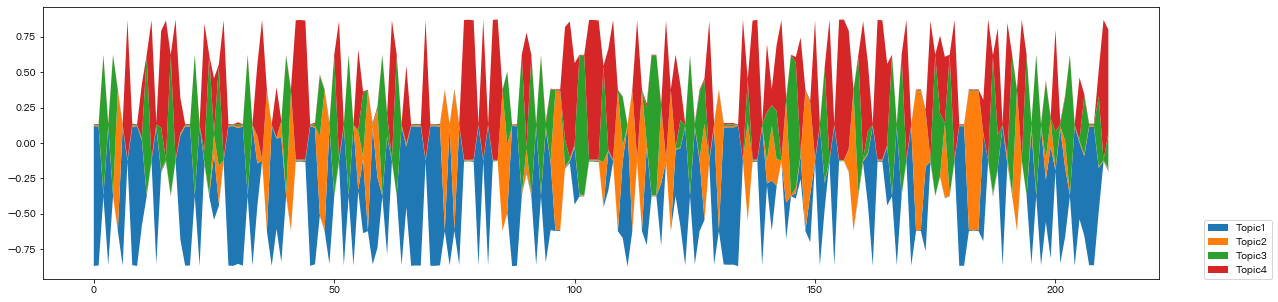

In [35]:
x_axis = corpus_df.index
y_axis = dt_df

fig, ax = plt.subplots(figsize=(20,5))

# Plot a stackplot - https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/stackplot_demo.html
ax.stackplot(x_axis, y_axis.T, baseline='wiggle', labels=y_axis.columns)

# Move the legend off of the chart
ax.legend(loc=(1.04,0))

In [ ]:
from tmtoolkit.topicmod.evaluate import metric_coherence_gensim
# lda_model - LatentDirichletAllocation()
# vect - CountVectorizer()
# texts - the list of tokenized words
norm_corpus
norm_corpus_tokens = [doc.split() for doc in norm_corpus]


metric_coherence_gensim(measure='c_v', 
                        top_n=10, 
                        topic_word_distrib= lda.components_, 
                        dtm=cv.fit_transform(norm_corpus), 
                        vocab=np.array(cv.get_feature_names()), 
                        texts=norm_corpus_tokens)